# Systemy uczące się - Zad. dom. 2: Naiwny klassyfikator Bayesa

### Autor rozwiązania
Uzupełnij poniższe informacje umieszczając swoje imię i nazwisko oraz numer indeksu:


In [ ]:
NAME = "Weronika Koga"
ID = "151574"

Ten notebook zawiera dwa zadania związane z klasyfikatorem naiwnego Bayesa, oprócz implementacji zawiera on równie pytania na które trzeba odpowiedzieć.

## Zadanie 1
Zadanie polega na implementacji klasyfikatora naiwnego Bayesa dla zmiennych ciągłych gdzie za rozkłady cechy przyjmij rozkłady normalne.

In [25]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.style.use("ggplot")

Do testowania twojego rozwiązania użyj trzech generatorów danych sztucznych `generate1`, `generate2` oraz `generate3` (funkcje te przyjmują jako argument liczbę elementów do wygenerowania z każdej klasy - domyślnie $N=100$). Sposób ich wywołania jest przedstawiony poniżej:

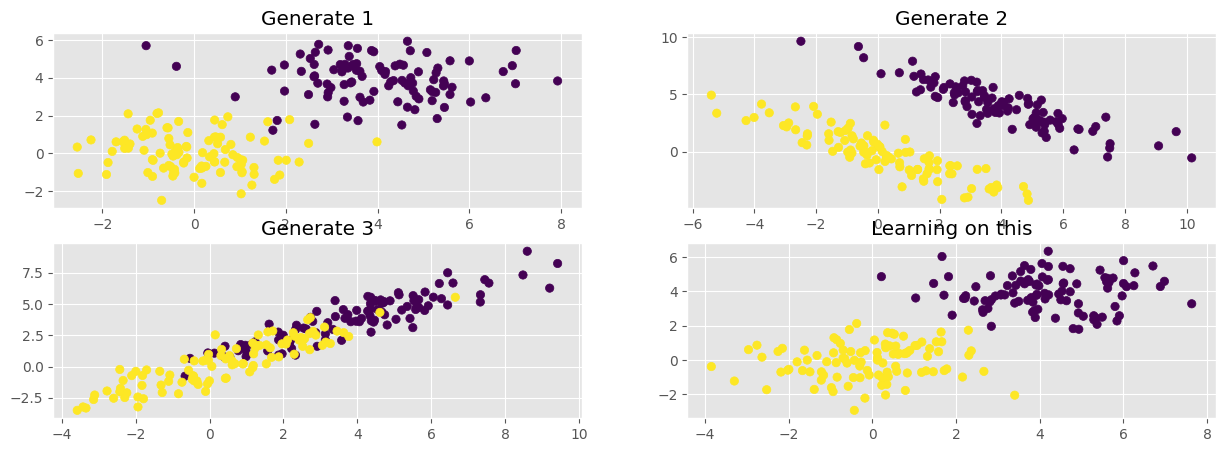

[[4.72602457 4.00983616]
 [4.2886727  3.79338128]
 [4.53005839 1.50172092]
 [4.4425523  2.73151852]
 [3.22457024 4.31848624]] [0 0 0 0 0]


[[2.80934762 3.39094201]
 [4.93419774 1.79482838]
 [3.83834443 3.37165443]
 [4.18194977 4.65024639]
 [3.98091651 4.31984473]] [0 0 0 0 0]


In [40]:
from helpers import generate1, generate2, generate3  # noqa

x, y = generate1()
x1, y1 = generate1()
x2, y2 = generate2()
x3, y3 = generate3()

fig, axs = plt.subplots(2, 2, figsize=(15, 5))

axs[0, 0].scatter(x1[:, 0], x1[:, 1], c=y1)
axs[0, 0].set_title("Generate 1")

axs[0, 1].scatter(x2[:, 0], x2[:, 1], c=y2)
axs[0, 1].set_title("Generate 2")

axs[1, 0].scatter(x3[:, 0], x3[:, 1], c=y3)
axs[1, 0].set_title("Generate 3")

axs[1, 1].scatter(x[:, 0], x[:, 1], c=y)
axs[1, 1].set_title("Learning on this")

plt.show()

print(x1[:5], y1[:5])
print("\n")
print(x[:5], y[:5])

W implementacji będzie przydatna klasa `norm` z pakietu `scipy`, która zwraca wartości funkcji gęstości prawdopodobieństwa rozkładu normalnego dla zmiennych ciągłych.

In [41]:
from scipy.stats import norm

# (x, mean, std)
norm.pdf(5, 0, 1)  # gęstość prawd. dla 5 z rozkładu standardowego
norm.logpdf(5, 0, 1)  # logarytm gęstości prawd. dla 5 z rozkładu standardowego

np.float64(-13.418938533204672)

Zaimplementuj klasyfikator naiwnego Bayesa dla zmiennych ciągłych. Pamiętaj o zabezpieczniu się przed problemem wynikającym z mnożenia wielu małych liczb (prawdopodobieństw).

In [ ]:
class GaussianNaiveBayes:
    def __init__(self) -> None:
        self.means = {}
        # Słownik, który docelowo powinien zawierać tablicę/wektor warunkowych średnich dla każdego atrybutu
        # Każda tablica/wektor powinna być typu np.array
        # np. 1) means[1] powinno zawierać wektor średnich wartości atrybutów  dla klasy o indeksie 1
        #     2) means[0][1] powinno zawierać średnią 1 atrybutu dla klasy o indeksie 0
        # (Możesz spróbować zaimplementować efektywniejszą implementację używając macierzy)
        self.stds = {}
        # Analogiczna struktura dla odchyleń standardowych
        self.class_log_prob = None
        # Wektor zawierający logarytmy prawdopodobieństwa dla każdej z klas
        # np. class_log_prob[1] zawiera logarytm prawdopodobieństwa, że klasa jest równa 1 P(C=1)

    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        """Funkcja trenująca klasyfikator naiwnego Bayesa na podstawie danych x i y.

        Args:
            x (np.ndarray): macierz danych wejściowych, gdzie każdy wiersz to obserwacja
            y (np.ndarray): wektor indeksów klas (0 lub 1) dla każdej obserwacji

        Returns:
            None
        """

        self.classes = np.unique(y)
        self.means = [np.mean(x[y == cls, :], axis=0) for cls in self.classes]
        self.stds = [np.std(x[y == cls, :], axis=0) for cls in self.classes]
        self.class_log_prob = np.log([np.mean(y == cls) for cls in self.classes])
        # y == cls daje tablice wartosci logicznych ktorej proporcja jest obliczana przez mean

    def predict_proba(self, x: np.ndarray) -> np.ndarray:
        """Funkcja zwracająca prawdopodobieństwa przynależności do klas dla każdej obserwacji w macierzy x.

        Args:
            x (np.ndarray): macierz danych wejściowych, gdzie każdy wiersz to obserwacja

        Returns:
            np.ndarray: macierz o dwóch kolumnach (dwie klasy) w której kolejne wiersze  zawierają prawdopodobieństwa P(c|x)
                przynależności dla klas dla kolejnych obserwacji w macierzy x

        """

        log_probs = np.array(
            [
                # norm.logpdf oblicza gęstość prawdopodobieństwa dla każdej obserwacji w x
                # potem sumuje je dla każdej klasy i dodaje logarytm prawdopodobieństwa klasy
                # to połączenie daje nam całkowity logarytm prawdopodobieństwa dla każdej obserwacji w danej klasie, uwzględniając zarówno wpływ cech, jak i prawdopodobieństwo samej klasy.
                # te komentarze sa bardziej dla mnie niz dla pana, ja wiem ze pan to wie.
                norm.logpdf(x, mean, std).sum(axis=1) + log_prob
                for mean, std, log_prob in zip(
                    self.means,
                    self.stds,
                    self.class_log_prob,
                )  # zip laczy 3 listy w jedna. Dla każdej klasy, uzyskujemy jedną średnią, jedno odchylenie standardowe i jeden logarytm prawdopodobieństwa.
            ]
        ).T  # Transpozycja, aby uzyskać odpowiedni kształt

        return np.exp(log_probs)

    def predict(self, x: np.ndarray) -> np.ndarray:
        # Gotowa funkcja wybierająca klasę z największym prawdopodobieństwem
        prob = self.predict_proba(x)
        return np.argmax(prob, axis=1)

Przetestuj twój klasyfikator na wygenerowanych wcześniej danych.

In [43]:
gnb = GaussianNaiveBayes()
gnb.fit(x, y)

# Trafność na zbiorze uczącym
print(np.mean(gnb.predict(x) == y))

1.0


Narysowanie nauczonego klasyfikatora

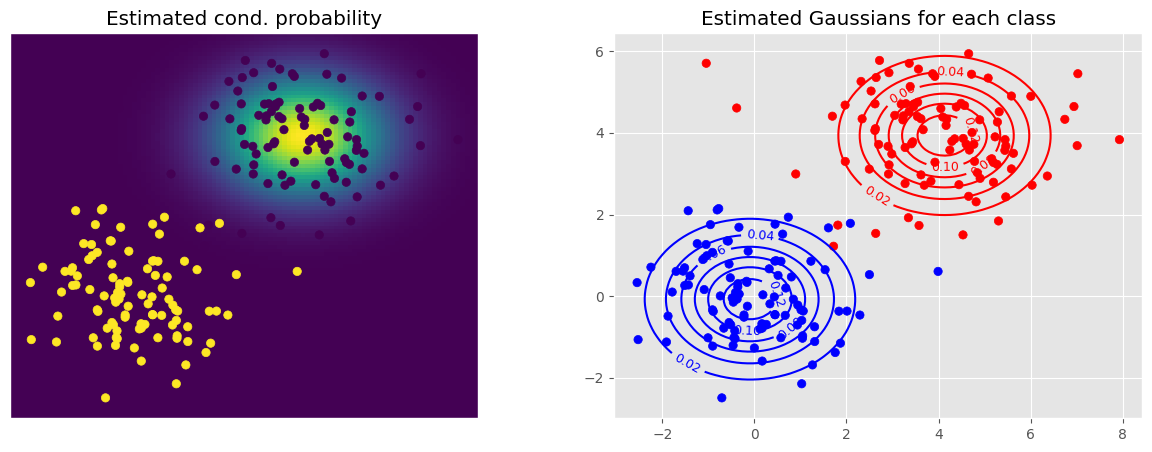

In [44]:
from helpers import plot_gaussian_bayes

plot_gaussian_bayes(x1, y1, gnb)

Użyj funkcji do generowania danych, aby wygenerować zbiór testowy oraz sprawdź na nim trafność klasyfikacji metody.

In [46]:
print("Moje wyniki:")

x1_test, y1_test = generate1(1000)
print(f" Trafnosc na zbiorze 1 {np.mean(gnb.predict(x1_test) == y1_test)}")

x2_test, y2_test = generate2(1000)
print(f" Trafnosc na zbiorze 2 {np.mean(gnb.predict(x2_test) == y2_test)}")

x3_test, y3_test = generate3(1000)
print(f" Trafnosc na zbiorze 3 {np.mean(gnb.predict(x3_test) == y3_test)}")

Moje wyniki:
 Trafnosc na zbiorze 1 0.995
 Trafnosc na zbiorze 2 0.998
 Trafnosc na zbiorze 3 0.8325


In [50]:
from helpers import GaussianBayes

print("Trafnosci z helpers.py:")
x, y = generate1()
gb = GaussianNaiveBayes()
gb.fit(x, y)
x_test, y_test = generate1(1000)
print("Trafność na zbiorze 1 ", np.mean(gb.predict(x_test) == y_test))

x, y = generate2()
gb = GaussianNaiveBayes()
gb.fit(x, y)
x_test, y_test = generate2(1000)
print("Trafność na zbiorze 2 ", np.mean(gb.predict(x_test) == y_test))

x, y = generate3()
gb = GaussianNaiveBayes()
gb.fit(x, y)
x_test, y_test = generate3(1000)
print("Trafność na zbiorze 3 ", np.mean(gb.predict(x_test) == y_test))

Trafnosci z helpers.py:
Trafność na zbiorze 1  0.9945
Trafność na zbiorze 2  1.0
Trafność na zbiorze 3  0.838


**Ćwiczenia**
 - Pamiętaj o przetestowaniu Twojego algorytmu dla wszystkich trzech generatorów danych. W których ze zbiorów założenie o warunkowej niezależności zmiennych jest spełnione? Jak brak spełnienia tego założenia wpływa na działanie klasyfikatora?
 - Z pliku `helpers` zaimportuj klasę `GaussianBayes` (identyczna obsługa jak tej zaimplementowanej przez Ciebie). Klasa implementuje algorytm Bayesa bez założenia o niezależności zmiennych (ale z założeniem o normalności rozkładów). Porównaj wyniki - szczególnie dla zbiorów dla których założenie o warunkowej niezależności zmiennych nie jest spełnione.
 - Klasyfikatora `GaussianBayes` nie można wytrenować na zbiorach które mają mniej niż 3 przykłady dla każdej z klas. Jak myślisz dlaczego? Jak ten problem będzie się zmieniał dla zbiorów o wysokiej liczbie cech?
 - Nawet używając klasyfikatora `GaussianBayes`, który zakłada kompletny model zależności i prawidłowy rozkład danych (nasze dane są generowane z rozkładów normalnych) - często nie jest w stanie uzyskać 100% trafności nawet na zbiorze uczącym. Jak myślisz, dlaczego? 
 - Czy gdyby przepisać do klasyfikatora prawdziwe wartości średnich i macierz wariancji-kowariancji cech (z generatora) - uzyskalibyśmy 100% trafność? Co możemy powiedzieć o takim klasyfikatorze? Czy jest możliwe uzyskanie klasyfikatora bardziej trafnego niż taki? 
 
 Odpowiedzi na dwa ostatnie pytania zostaną sprawdzone: wpisz swoje odpowiedzi poniżej.

## Odpowiedz na dwa ostatnie

przed-ostatnie: Naiwny Baies jest naiwny bo zakłada, że wszystkie cechy są niezależne od siebie co w rzeczywistości może nie być prawdziwe i prowadzić do błędów. Nasze dane sa generowane z rozkladow normalnych ale jeśli wartości średnich i odchyleń standardowych dla różnych klas są zbliżone to mogą wystąpić przykłady, które są trudne do jednoznacznej klasyfikacji, przez wzglad na "rozmyte granice" (zbiór 3).

ostatnie: Nie będzie miał 100% trafności - z powodu w zadaniu 4. W praktyce istnieją inne sposoby, które mogą lepiej radzić sobie z nieliniowymi granicami klas np. SVM. Gdyby Bayes był idealny to nie musielibyśmy się z tym SVM męczyć...

# Zadanie 2
Klasyfikator naiwnego Bayesa często jest używany do klasyfikacji tekstów. Przetestuj działanie algorytmów na podanym rzeczywistym zbiorze danych: 
> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

Podany zbiór jest wieloklasowy, więc poniższy kod wybiera z niego podzbiór postów tylko z dwóch tematów.

In [51]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

categories = ["comp.graphics", "sci.space"]
newsgroups_train = fetch_20newsgroups(subset="train", categories=categories)
newsgroups_test = fetch_20newsgroups(subset="test", categories=categories)

vectorizer = TfidfVectorizer(
    binary=True, use_idf=False, norm=None
)  # Przekształcenie tekstu na cechy binarne
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)
vectors = vectors.toarray()
vectors_test = vectors_test.toarray()

Dokumenty w zbiorze można wyświetlić w następujący sposób.

In [52]:
newsgroups_train.data[0:3]

['From: ab@nova.cc.purdue.edu (Allen B)\nSubject: Re: thining algorithm\nOrganization: Purdue University\nLines: 15\n\nIn article <1q7615INNmi@shelley.u.washington.edu> kshin@stein.u.washington.edu  \n(Kevin Shin) writes:\n> I am trying obtain program to preprocess handwriting characters.\n> Like thining algorithm, graph alogrithm.\n> Do anyone know where I can obtain those?\n\nI usually use "Algorithms for graphics and image processing" by\nTheodosios Pavlidis, but other people here got them same idea and now\n3 of 4 copies in the libraries have been stolen!\n\nAnother reference is "Digital Image Processing" by Gonzalez and\nWintz/Wood, which is widely available but a little expensive ($55\nhere- I just checked today).\n\nab\n',
 "From: stephens@geod.emr.ca (Dave Stephenson)\nSubject: Re: Clementine Science Team Selected\nNntp-Posting-Host: ngis.geod.emr.ca\nOrganization: Dept. of Energy, Mines, and Resources, Ottawa\nLines: 32\n\nnickh@CS.CMU.EDU (Nick Haines) writes:\n\n>In article 

Analogicznie możemy uzyskać dostęp do informacji o klasach.

In [53]:
newsgroups_train.target[0:3]

array([0, 1, 0])

i do "zbinaryzowanego" tekstu

In [ ]:
vectors[0:3]

Wytrenuj klasyfikator Naiwnego Bayesa z rozmywaniem estymat (patrz pakiet `sklearn`) i sprawdż jego trafność na zbiorze uczącym i testowym.

In [55]:
# TWÓJ KOD TUTAJ
# Stworzenie i nauczenie modelu
# Ewaluacja na zbiorze testowym

from sklearn.naive_bayes import MultinomialNB


mnb = MultinomialNB()
mnb.fit(vectors, newsgroups_train.target)

print(
    "Trafność na zbiorze uczącym ",
    np.mean(mnb.predict(vectors) == newsgroups_train.target),
)
print(
    "Trafność na zbiorze testowym ",
    np.mean(mnb.predict(vectors_test) == newsgroups_test.target),
)

Trafność na zbiorze uczącym  0.9957519116397621
Trafność na zbiorze testowym  0.9616858237547893


**Ćwiczenia**
 - Dlaczego klasyfikator Naiwnego Bayesa dość dobrze sprawdza się do powyższego zadania i analogicznych?
 - Przeanalizuj wartości estymat prawdopodobieństw. Które cechy/słowa są najlepszymi wskaźnikami dla podanych klas? Jakie słowa bardzo słabo wskazują na którąkolwiek z klas?
 - Czy byłoby możliwe wytrenowanie równie skutecznego klasyfikatora z mniejszą liczbą cech? W jaki sposób można by to uzyskać?
 - Analizowany zbiór jest oryginalnie wieloklasowy z tego powodu możemy go wykorzystać do wielu testów wybierając różne pary klas. Pełna lista tematów: 'alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'
 - Czy są pary tematów dla których ten klasyfikator działa znacząco gorzej?
 - Jakie są zalety stosowania klasyfikatora Bayesa dla tego problemu (i w ogólności)? Czy do tego problemu sprawdziłyby się reguły lub drzewa decyzyjne? Dlaczego?
 
 Odpowiedzi na kropki 1, 3 i 6 wpisz poniżej - zostaną sprawdzone.

[miejsce na odpowiedzi]

## Odpowiedzi

1 - Naiwny Bayes sie tu sprawdza bo 
- zakłada niezależność cech no i jakby przeanalizować to zdanie które teraz napisałam to każde z tych słów jest w zasadzie niezależne. 
- nawet przy ograniczonej ilości danych treningowych, Naiwny Bayes często dobrze radzi sobie z generalizacją na nowe, nieznane teksty



3 -  Okej a wiec ja nie bylam na informatyce wiec nie wiem tego z inżynierki jak połowa, tylko z internetu. Czytam więc teraz o rzeczach o którch pierwsze słyszę i mogę przedstawić tutaj mój skromny research. Więc warto zastosować :

1. techniki selekcji cech np:
- chi-kwadrat (nie wiem co to)
- PCA (nie wiem co to)
- lub samemu wyeliminowac te cechy ktore w tej klasyfikacji tylko utrudniaja. 
2. techniki przetwarzania języka naturalnego takie jak:
- semantyzacja (wiem co to)
- usuwanie stop słów (wiem co to)

Dzieki temu mozna poprawic wydajnosc modelu i zmniejszyc ryzyko przeuczenia 

6 - 
Zalety Bayesa:
- potrafi skutecznie klasyfikować dane nawet wtedy, gdy niektóre cechy są nieobecne, co jest częste w naturalnym języku
- dobrze radzi sobie z danymi, które były wcześniej nieznane, a teksty mogą zawierać różne słowa i zwroty.
- jest obliczeniowo mało kosztowny dzięki temu można szybko trenować model na dużych zbiorach danych
Problem drzew:
- podatne na przeuczenie w przypadku duzej liczby cech czyli wlasnie słów
- klątwa wielowymiarowości sprawia, że trudniej jest znaleźć jednoznaczne reguły decyzyjne w wysokowymiarowej przestrzeni cech, co ogranicza ich skuteczność w uchwyceniu subtelnych zależności w danych tekstowych
- mogą mieć problemy z rozmytymi granicami klas, co jest istotne w kontekście analizy języka naturalnego, gdzie znaczenie słów może być kontekstowe